In [6]:
import matplotlib.pyplot as plt
from matplotlib import patches
import pandas as pd
from PIL import Image

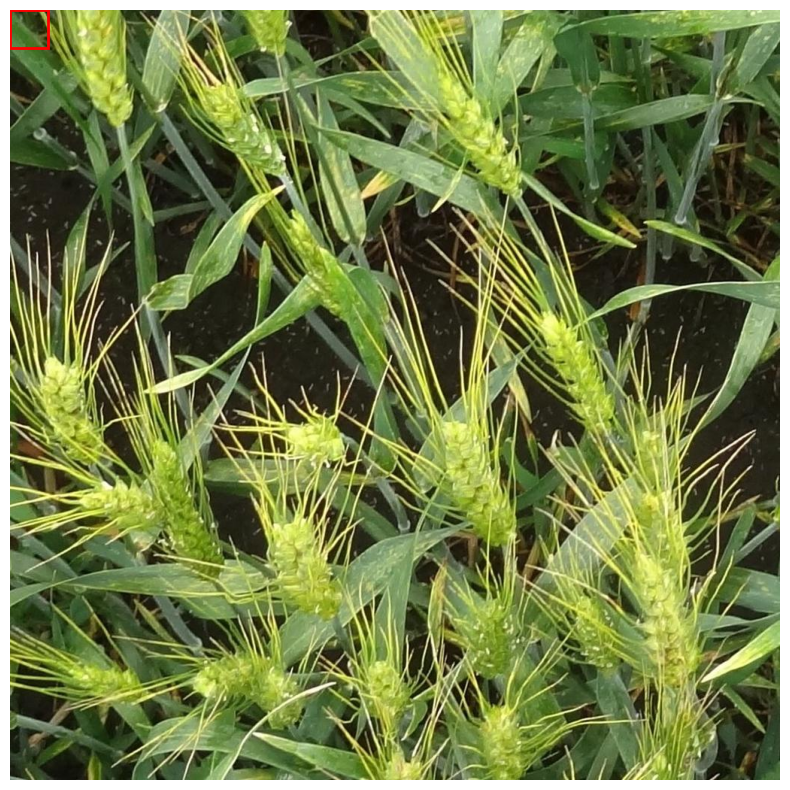

In [7]:
def plot_predicted_boxes(image_path, prediction_string):
    img = Image.open(image_path)
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.imshow(img)

    if isinstance(prediction_string, str) and prediction_string.strip():
        # Parse space-separated values: confidence x y width height
        predictions = prediction_string.strip().split()
        num_predictions = len(predictions) // 5  # 5 values per box

        for i in range(num_predictions):
            conf = float(predictions[i * 5])
            x = float(predictions[i * 5 + 1])
            y = float(predictions[i * 5 + 2])
            width = float(predictions[i * 5 + 3])
            height = float(predictions[i * 5 + 4])

            rect = patches.Rectangle(
                (x, y), width, height, linewidth=2, edgecolor="r", facecolor="none"
            )
            ax.add_patch(rect)

    plt.axis("off")
    plt.show()


# Usage
df = pd.read_csv("global-wheat-detection/sample_submission.csv")
image_id = df["image_id"].iloc[0]
image_path = f"global-wheat-detection/test/{image_id}.jpg"
plot_predicted_boxes(image_path, df.loc[0, "PredictionString"])